## Setup

In [1]:
!pip install numpy
!pip install pandas
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Specify project directories in Sherlock
data_path = '/oak/stanford/groups/mrivas/projects/wgs-constraint-llm/data/'
results_path = '/oak/stanford/groups/mrivas/projects/wgs-constraint-llm/osthoag/wgs-constraint-llm/results/'

# Specify the file paths
acount_file_path = data_path + 'ukb24310_c19.qced_nonrel.acount.gz'
vmiss_file_path = data_path + 'ukb24310_c19.qced_nonrel.vmiss.gz'
hardy_file_path = data_path + 'ukb24310_c19.qced_nonrel.hardy.gz'

## Load data

In [3]:
# Read the compressed file into a pandas DataFrame
acount_df = pd.read_csv(acount_file_path, compression='gzip', sep='\t')
acount_df

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_CTS,OBS_CT
0,19,chr19:60005:A:T,A,T,Y,0,4
1,19,chr19:60007:A:C,A,C,Y,0,4
2,19,chr19:60009:A:C,A,C,Y,0,4
3,19,chr19:60019:G:T,G,T,Y,0,4
4,19,chr19:60022:C:T,C,T,Y,0,4
...,...,...,...,...,...,...,...
28665073,19,chr19:58607611:A:G,A,G,Y,8,22
28665074,19,chr19:58607615:T:C,T,C,Y,0,32
28665075,19,chr19:58607615:T:G,T,G,Y,29,32
28665076,19,chr19:58607616:T:A,T,A,Y,5,42


In [7]:
# Read the compressed file into a pandas DataFrame
vmiss_df = pd.read_csv(vmiss_file_path, compression='gzip', sep='\t')
vmiss_df

,#CHROM,ID,MISSING_CT,OBS_CT,F_MISS
0,19,chr19:60005:A:T,393850,393852,0.999995
1,19,chr19:60007:A:C,393850,393852,0.999995
2,19,chr19:60009:A:C,393850,393852,0.999995
3,19,chr19:60019:G:T,393850,393852,0.999995
4,19,chr19:60022:C:T,393850,393852,0.999995
...,...,...,...,...,...
28665073,19,chr19:58607611:A:G,393841,393852,0.999972
28665074,19,chr19:58607615:T:C,393836,393852,0.999959
28665075,19,chr19:58607615:T:G,393836,393852,0.999959
28665076,19,chr19:58607616:T:A,393831,393852,0.999947


In [8]:
# Read the compressed file into a pandas DataFrame
hardy_df = pd.read_csv(hardy_file_path, compression='gzip', sep='\t')
hardy_df

,#CHROM,ID,A1,AX,HOM_A1_CT,HET_A1_CT,TWO_AX_CT,O(HET_A1),E(HET_A1),P
0,19,chr19:60005:A:T,A,T,2,0,0,0.000000,0.000000,1.000000
1,19,chr19:60007:A:C,A,C,2,0,0,0.000000,0.000000,1.000000
2,19,chr19:60009:A:C,A,C,2,0,0,0.000000,0.000000,1.000000
3,19,chr19:60019:G:T,G,T,2,0,0,0.000000,0.000000,1.000000
4,19,chr19:60022:C:T,C,T,2,0,0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
28665073,19,chr19:58607611:A:G,A,G,6,2,3,0.181818,0.462810,0.058824
28665074,19,chr19:58607615:T:C,T,C,16,0,0,0.000000,0.000000,1.000000
28665075,19,chr19:58607615:T:G,T,G,0,3,13,0.187500,0.169922,1.000000
28665076,19,chr19:58607616:T:A,T,A,18,1,2,0.047619,0.209751,0.009381


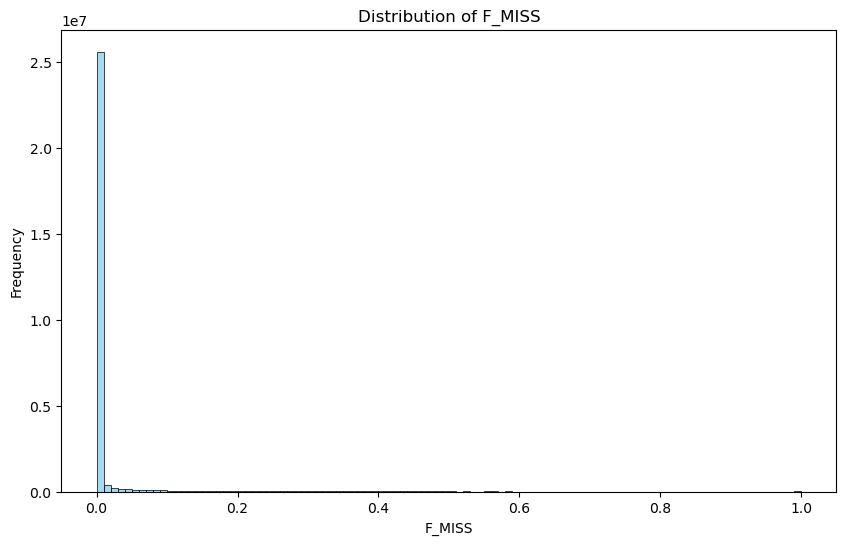

In [15]:
# Plot the distribution of the "F_MISS" column
plt.figure(figsize=(10, 6))
sns.histplot(vmiss_df['F_MISS'], bins=100, color='skyblue')
plt.title('Distribution of F_MISS')
plt.xlabel('F_MISS')
plt.ylabel('Frequency')
plt.show()

## Compare predictions for AoU data and UKB data for chromosome 19

In [2]:
aou_chr19_predictions_df = pd.read_csv(results_path + "HMM_aou_constraint_predictions_chr19.tsv.gz", compression='gzip', sep='\t')
ukb_chr19_predictions_df = pd.read_csv(results_path + "HMM_ukb_constraint_predictions_chr19.tsv.gz", compression='gzip', sep='\t')

# Merge the DataFrames on the columns 'chr' and 'pos'
merged_df = pd.merge(aou_chr19_predictions_df, ukb_chr19_predictions_df, on=['chr', 'pos'], suffixes=('_aou', '_ukb'))

merged_df

,chr,pos,prob_0_aou,prob_1_aou,observation_aou,prob_0_ukb,prob_1_ukb,observation_ukb
0,chr19,60645,2.621388e-35,1.000000,0.0,2.621396e-35,1.000000,0.0
1,chr19,60646,6.635288e-01,0.336471,0.0,6.635308e-01,0.336469,0.0
2,chr19,60647,8.721584e-01,0.127842,0.0,8.721616e-01,0.127838,0.0
3,chr19,60648,9.377551e-01,0.062245,0.0,9.377604e-01,0.062240,0.0
4,chr19,60649,9.583747e-01,0.041625,0.0,9.583863e-01,0.041614,0.0
...,...,...,...,...,...,...,...,...
55042752,chr19,58607370,5.260989e-04,0.999474,0.0,5.260992e-04,0.999474,0.0
55042753,chr19,58607371,2.120975e-06,0.999998,1.0,2.144856e-06,0.999998,1.0
55042754,chr19,58607372,2.271861e-06,0.999998,1.0,5.260998e-04,0.999474,1.0
55042755,chr19,58607373,3.873230e-03,0.996127,1.0,5.261542e-04,0.999474,0.0


In [15]:
print("Count of prob_0_aou > 0.8:", len(merged_df[merged_df['prob_0_aou'] > 0.8]))
print("Count of prob_0_ukb > 0.8:", len(merged_df[merged_df['prob_0_ukb'] > 0.8]))
print("Count of prob_0_aou > 0.8 and prob_0_ukb > 0.8:", len(merged_df[(merged_df['prob_0_aou'] > 0.8) & (merged_df['prob_0_ukb'] > 0.8)]))
print("Count of prob_0_aou > 0.7 and prob_0_ukb > 0.7:", len(merged_df[(merged_df['prob_0_aou'] > 0.7) & (merged_df['prob_0_ukb'] > 0.7)]))
print("Count of full dataframe:", len(merged_df))

Count of prob_0_aou > 0.8: 8556815
Count of prob_0_ukb > 0.8: 7058277
Count of prob_0_aou > 0.8 and prob_0_ukb > 0.8: 2466567
Count of prob_0_aou > 0.7 and prob_0_ukb > 0.7: 3288463
Count of full dataframe: 55042757


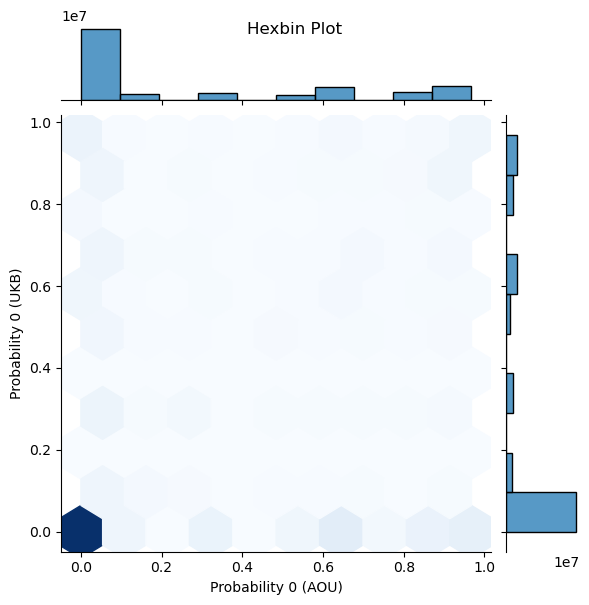

In [8]:
# Plot joint distribution of predicted constraint probabilities
sns.jointplot(data=merged_df, x='prob_0_aou', y='prob_0_ukb', kind='hex', cmap='Blues', marginal_kws=dict(bins=10), gridsize=9)

# Add labels and title
plt.xlabel('Probability 0 (AOU)')
plt.ylabel('Probability 0 (UKB)')
plt.suptitle('Hexbin Plot')

# Show the plot
plt.show()

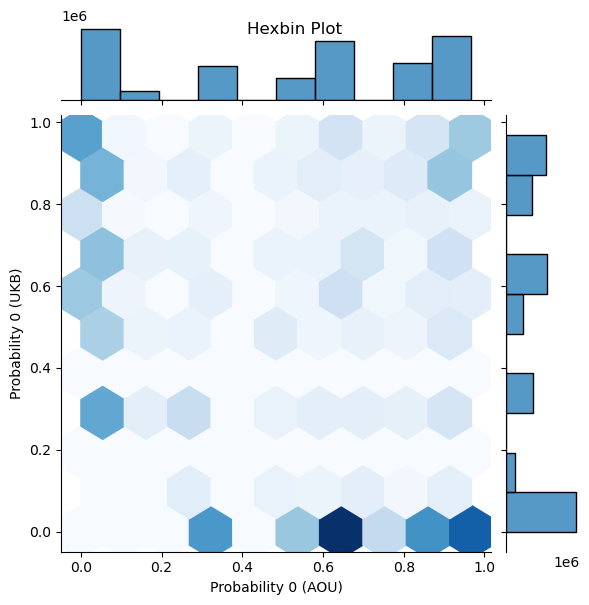

In [14]:
# Plot joint distribution of predicted constraint probabilities minus the bottom left quadrant
sns.jointplot(data=merged_df[(merged_df['prob_0_aou'] >= 0.2) | (merged_df['prob_0_ukb'] >= 0.2)], x='prob_0_aou', y='prob_0_ukb', kind='hex', cmap='Blues', marginal_kws=dict(bins=10), gridsize=9)

# Add labels and title
plt.xlabel('Probability 0 (AOU)')
plt.ylabel('Probability 0 (UKB)')
plt.suptitle('Hexbin Plot')

# Show the plot
plt.show()

In [17]:
merged_df = merged_df.drop(columns=['prob_1_aou', 'prob_1_ukb'])

# Save results for future analysis
merged_df.to_csv(results_path + "HMM_ukb_aou_joint_constraint_predictions_chr19.tsv.gz", index=False, compression='gzip', sep='\t')

In [10]:
X = merged_df['prob_0_aou']
X = sm.add_constant(X)
y = merged_df['observation_ukb']

# Fit the logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

print(model.pseudo_rsquared('McFadden'))
print(model.summary())

0.03824690337555903
                 Generalized Linear Model Regression Results                  
Dep. Variable:        observation_ukb   No. Observations:             55042757
Model:                            GLM   Df Residuals:                 55042755
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5123e+07
Date:                Sun, 18 Feb 2024   Deviance:                   7.0246e+07
Time:                        16:21:26   Pearson chi2:                 5.53e+07
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04949
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1491      0.000

In [10]:
X = merged_df['prob_0_aou']
X = sm.add_constant(X)
y = merged_df['prob_0_ukb']

# Fit the logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

print(model.pseudo_rsquared('McFadden'))
print(model.summary())

0.05809861803917371
                 Generalized Linear Model Regression Results                  
Dep. Variable:             prob_0_ukb   No. Observations:             55042757
Model:                            GLM   Df Residuals:                 55042755
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5423e+07
Date:                Sun, 18 Feb 2024   Deviance:                   3.5195e+07
Time:                        17:51:21   Pearson chi2:                 3.40e+07
No. Iterations:                     6   Pseudo R-squ. (CS):            0.05539
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6162      0.000

In [21]:
merged_df['prob_0_multiplied'] = merged_df['prob_0_aou'] * merged_df['prob_0_ukb']

X = merged_df['prob_0_multiplied']
X = sm.add_constant(X)
y = merged_df['observation_ukb']

# Fit the logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

print(model.pseudo_rsquared('McFadden'))
print(model.summary())

0.2513993190656507
                 Generalized Linear Model Regression Results                  
Dep. Variable:        observation_ukb   No. Observations:             55042757
Model:                            GLM   Df Residuals:                 55042755
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7339e+07
Date:                Sun, 18 Feb 2024   Deviance:                   5.4677e+07
Time:                        18:57:35   Pearson chi2:                 4.19e+07
No. Iterations:                    14   Pseudo R-squ. (CS):             0.2837
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              